<a href="https://colab.research.google.com/github/naga-dheeraj-p/Machine_LEARNING_projects/blob/main/CleanTech_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

In [105]:
import pandas as pd
data=pd.read_csv("/content/sample_data/clean_tech_graph.csv")
data.head()

,Date,GHI,PR
0,2019/07/01,3.256608,69.575676
1,2019/07/02,3.976767,79.314411
2,2019/07/03,2.811867,61.020006
3,2019/07/04,3.658408,83.262576
4,2019/07/05,5.590683,82.124440


In [106]:
data['PR_MA_30'] = data['PR'].rolling(window=30).mean()
data['Date'] = pd.to_datetime(data['Date'])
start_date = data['Date'].min()
data['Budget'] = 73.9 - 0.6 * ((data['Date'] - start_date).dt.days // 365)

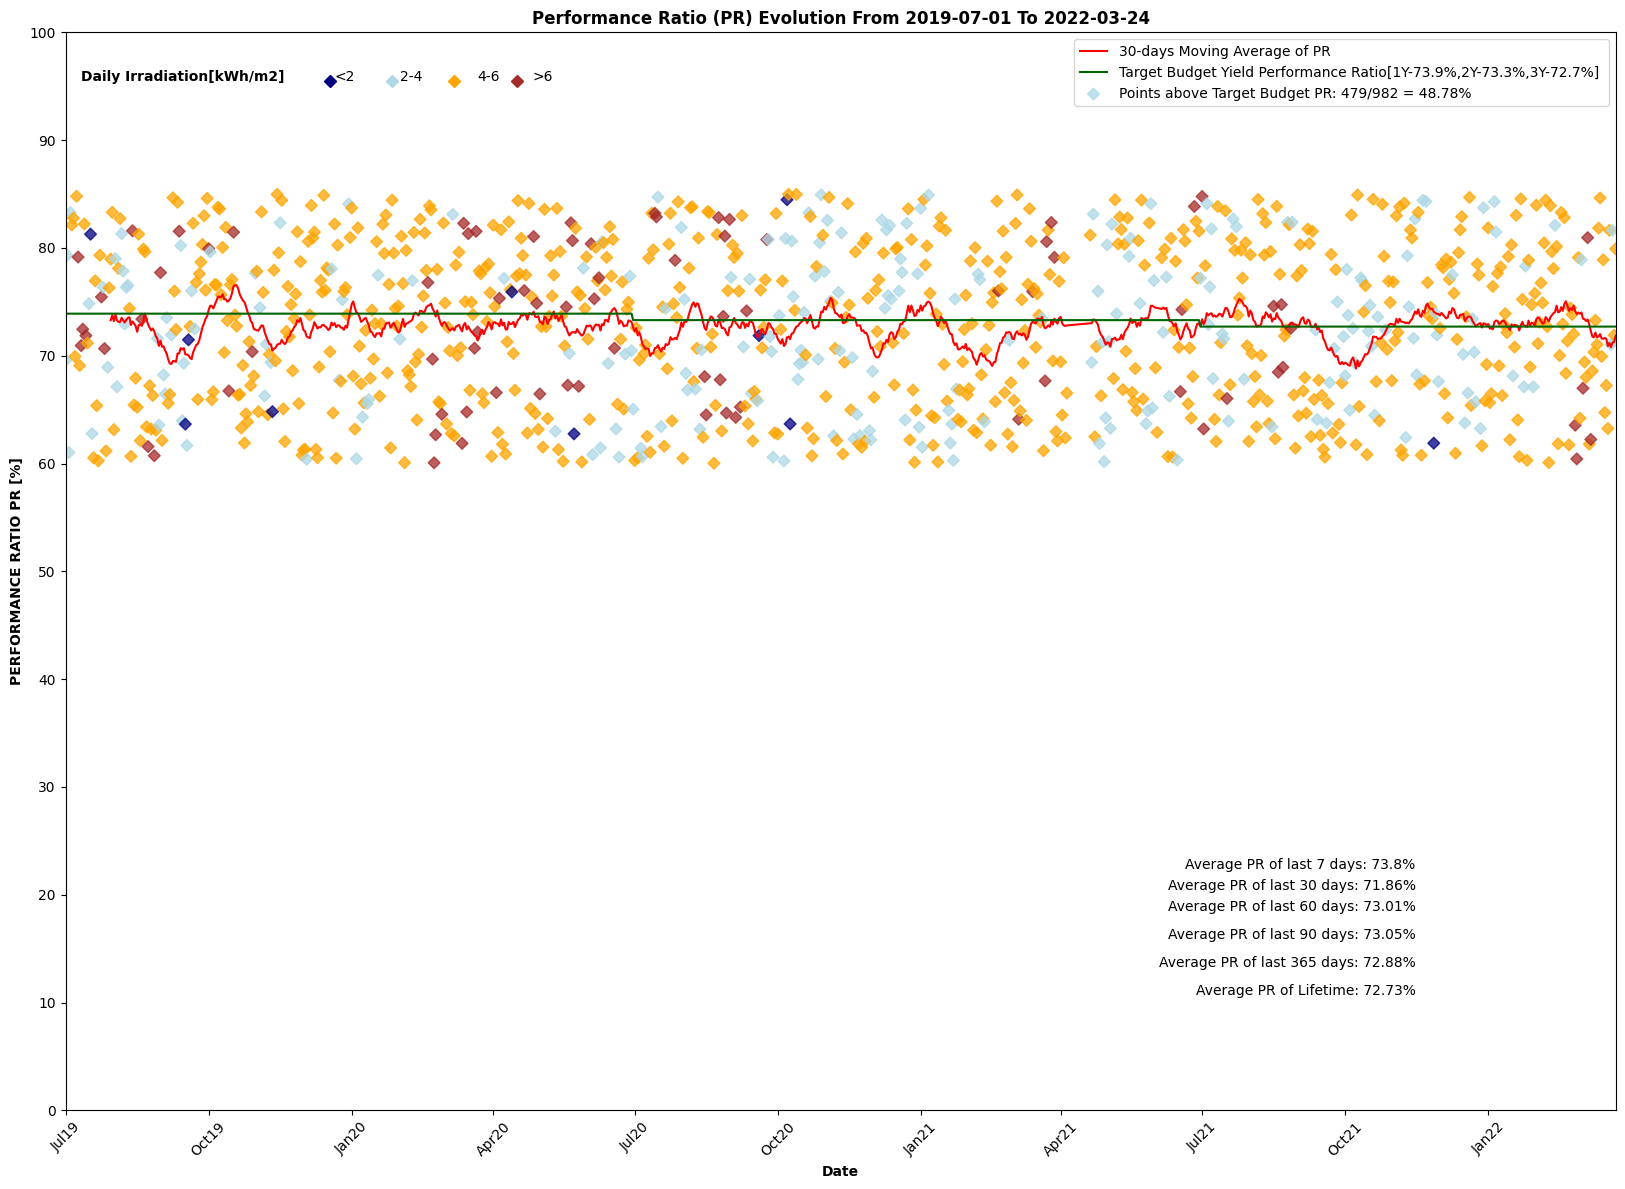

In [139]:
data['Date'] = pd.to_datetime(data['Date'])
start_date = data['Date'].min()
data['Budget'] = 73.9 - 0.6 * ((data['Date'] - start_date).dt.days // 365)

colors = np.select([data['GHI'] < 2, (data['GHI'] >= 2) & (data['GHI'] < 4), (data['GHI'] >= 4) & (data['GHI'] < 6), data['GHI'] >= 6], ['navy', 'lightblue', 'orange', 'brown'])

count = (data['PR'] > data['Budget']).sum()
total_count=data['PR'].count()
#print("Points above Target Budget PR=",round(count/total_count*100,2),"%")


plt.figure(figsize=(20,14))
plt.plot(data['Date'], data['PR_MA_30'], color='red', label='30-days Moving Average of PR')
plt.plot(data['Date'], data['Budget'], color='darkgreen', label='Target Budget Yield Performance Ratio[1Y-73.9%,2Y-73.3%,3Y-72.7%] ')

label_text = f'Points above Target Budget PR: {count}/{total_count} = {round(count/total_count*100, 2)}%'
plt.scatter(data['Date'], data['PR'], c=colors, label=label_text, alpha=0.75,marker='D')

plt.legend()
plt.ylim(1, 100)
plt.xlim(data['Date'].iloc[0], data['Date'].iloc[-1])
plt.yticks(np.arange(0, 101, 10))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b%y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1, 4, 7, 10]))
plt.xticks(rotation=45)


last_7_days_values = data['PR'][-7:]
avg_last_7_days = round(last_7_days_values.mean(),2)

last_30_days_values = data['PR'][-30:]
avg_last_30_days = round(last_30_days_values.mean(),2)

last_60_days_values = data['PR'][-60:]
avg_last_60_days = round(last_60_days_values.mean(),2)

last_90_days_values = data['PR'][-90:]
avg_last_90_days = round(last_90_days_values.mean(),2)

last_365_days_values = data['PR'][-365:]
avg_last_365_days = round(last_365_days_values.mean(),2)

lifetime_values = data['PR'][:]
avg_lifetime = round(lifetime_values.mean(),2)

plt.figtext(0.8, 0.28, f'Average PR of last 7 days: {avg_last_7_days}%', ha='right', va='bottom')
plt.figtext(0.8, 0.27, f'Average PR of last 30 days: {avg_last_30_days}%', ha='right', va='center')
plt.figtext(0.8, 0.26, f'Average PR of last 60 days: {avg_last_60_days}%', ha='right', va='top')
plt.figtext(0.8, 0.24, f'Average PR of last 90 days: {avg_last_90_days}%', ha='right', va='top')
plt.figtext(0.8, 0.22, f'Average PR of last 365 days: {avg_last_365_days}%', ha='right', va='top')
plt.figtext(0.8, 0.20, f'Average PR of Lifetime: {avg_lifetime }%', ha='right', va='top')


plt.xlabel('Date',fontweight='bold')
plt.ylabel('PERFORMANCE RATIO PR [%]',fontweight='bold')
plt.title('Performance Ratio (PR) Evolution From 2019-07-01 To 2022-03-24',fontweight='bold')
plt.text(data['Date'][10], data['PR'][300]+20, 'Daily Irradiation[kWh/m2]',fontweight='bold')

plt.text(data['Date'][173], data['PR'][300]+20, '<2')
plt.plot(data['Date'][170], data['PR'][300]+20,marker='D', color='navy')
plt.text(data['Date'][215], data['PR'][300]+20, '2-4')
plt.plot(data['Date'][210], data['PR'][300]+20,marker='D', color='lightblue')
plt.text(data['Date'][265], data['PR'][300]+20, '4-6')
plt.plot(data['Date'][250], data['PR'][300]+20,marker='D', color='orange')
plt.text(data['Date'][300], data['PR'][300]+20, '>6')
plt.plot(data['Date'][290], data['PR'][300]+20,marker='D', color='brown')

plt.show()

In [108]:
count=0
total_count=data['PR'].count()
data['Date'] = pd.to_datetime(data['Date'])
start_date = data['Date'].min()
data['Budget'] = 73.9 - 0.6 * ((data['Date'] - start_date).dt.days // 365)
#for x in data['Budget']:
for i in data['PR']:
  if i>73.9:
    count+=1
print(round(count/total_count*100,2),"%")
print(count)

46.54 %
457


In [109]:
count = (data['PR'] > data['Budget']).sum()
total_count=data['PR'].count()
print(count)
print(total_count)
print("Points above Target Budget PR=",round(count/total_count*100,2),"%")

479
982
Points above Target Budget PR= 48.78 %
